# Function Approximation using Neural Net
A key component of doing Deep Q learning is to use a neural net to approximate a function.  In particular, we'll be building a neural net to approximate the function that says how desirable it is to be in a given state.

Before we create the real function approximator for our reinforcement learning, let's get down the 
basic mechanics of function approximation using a neural net.

Reference: [Using Keras to Approximate Functions](https://robertfilter.net/blog/machine-learning/how-to-implement-a-simple-neural-network-as-interpolation-function-in-python-using-keras.html)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
def plot_fn(f, start, end, point_count = 100):
    x = np.linspace(start, end, point_count)
    y = f(x)
    plt.plot(x, y)
    plt.show()

## The function we'll approximate

In [4]:
def thefunc(x):
    return 0.25 * (np.sin(2*np.pi * x**2)+2)

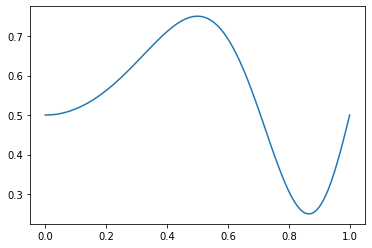

In [5]:
plot_fn(thefunc, 0, 1)

# Neural net

In [31]:
model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

 - [ ] What's the idea behind using an 8 layer first node?
 - [ ] Would a 64 layer first node work as well?
 - [ ] Would 2 64 layer nodes work?

## Training

In [13]:
X = np.random.sample([1024])
Y = thefunc(X) + 0.2 * np.random.normal(0, 0.2, len(X))

X_actual = np.arange(0, 1, 0.01)
Y_actual = thefunc(X_actual)

In [ ]:
epochs = 128
batch_size = 16
model.fit(X, Y, epochs=epochs, batch_size=batch_size)

In [15]:
Yhat = model.predict(X_actual)

## Plot Results

In [28]:
def predict_plot(model, start, end):
    X_actual = np.arange(start, end, 0.01)
    Y_actual = thefunc(X_actual)
    Yhat = model.predict(X_actual)
    
    plt.plot(X, Y, '.', label='Noisy Input Data')
    plt.plot(X_actual, Y_actual, label='Actual function', linewidth=4.0, c='black')
    plt.plot(X_actual, Yhat, label='Neural Net Output', linewidth=4.0, c='red')
    plt.legend()
    plt.show()

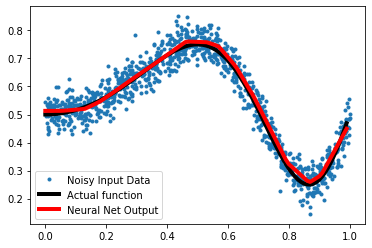

In [29]:
predict_plot(model, 0,1)

It did a terrific job of filtering out the noise and approximating the function!

Now we only exposed the neural net to values from 0 to 1. Let's see how it does in the range it's never seen:

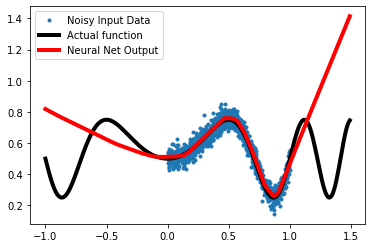

In [30]:
predict_plot(model, -1, 1.5)

## Experimenting
Let's try a couple of experiments to see how well this can approximate functions in different situations.  Let's try:
 * More sparse inputs. Can it fill the gaps and interpolate between sparse input points?
 * Different input layer size.  How does the input layer size impact its ability to approximate?
 * Fewer layers
 * Fewer nodes per layer

### Sparse inputs
Let's make a function that creates and trains a model. We'll have it accept hyperparameters to try our various experiments.

In [73]:
def make_scenario(training_samples=1024, epochs=128, layer1_size=8, hidden_layers=2, layer_size=64):
    model = Sequential()
    model.add(Dense(layer1_size, input_dim=1, activation='relu'))
    for i in range(hidden_layers):
        model.add(Dense(layer_size, activation='relu'))
        model.add(Dense(layer_size, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mse', metrics=['mse'])

    X = np.random.sample([training_samples])
    Y = thefunc(X) + 0.2 * np.random.normal(0, 0.2, len(X))
    
    model.fit(X, Y, epochs=epochs, batch_size=16, verbose=0)

    X_actual = np.arange(0, 1, 0.01)
    Y_actual = thefunc(X_actual)
    Y_hat = model.predict(X_actual)

    plt.plot(X, Y, '.', label='Noisy Input Data')
    plt.plot(X_actual, Y_actual, label='Actual function', linewidth=4.0, c='black')
    plt.plot(X_actual, Y_hat, label='Neural Net Output', linewidth=4.0, c='red')
    plt.title('Samples=%d layer1_size=%d hidden_layers=%d layer_size=%d' \
              % (training_samples, layer1_size, hidden_layers, layer_size))
    plt.legend()
    plt.show()
    
    return {
        'model': model,
        'X': X,
        'Y': Y,
        'X_actual': X_actual,
        'Y_actual': Y_actual,
        'Y_hat': Y_hat
    }


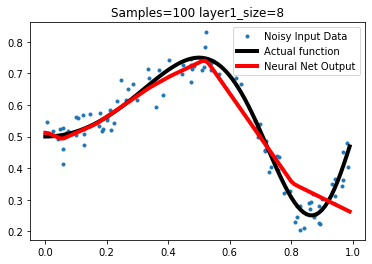

In [54]:
sparse = make_scenario(training_samples=100)

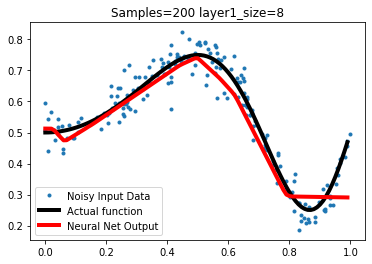

In [55]:
sparse = make_scenario(training_samples=200)

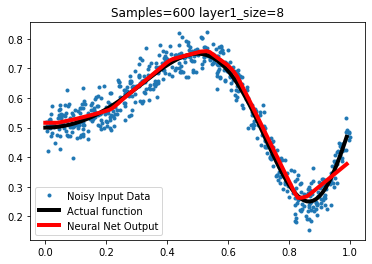

In [56]:
sparse = make_scenario(training_samples=600)

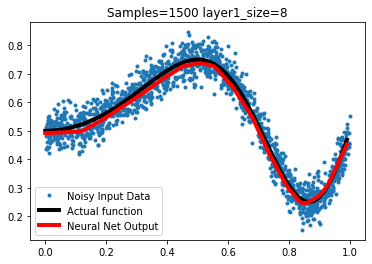

In [57]:
sparse = make_scenario(training_samples=1500)

### Input Layer Size

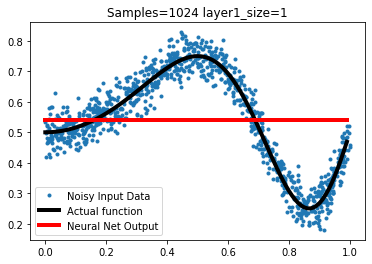

In [60]:
small_layer1 = make_scenario(layer1_size=1)

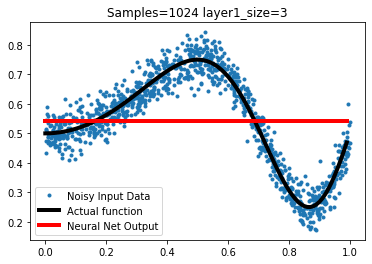

In [61]:
small_layer1 = make_scenario(layer1_size=3)

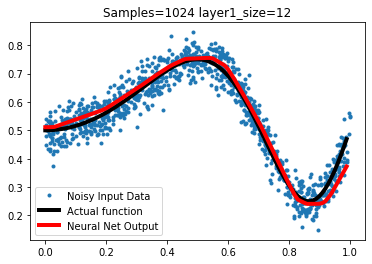

In [62]:
small_layer1 = make_scenario(layer1_size=12)

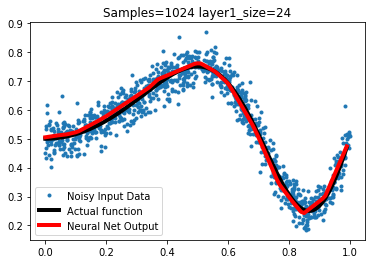

In [63]:
small_layer1 = make_scenario(layer1_size=24)

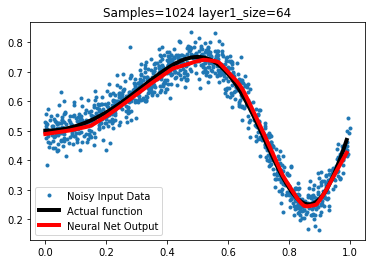

In [64]:
small_layer1 = make_scenario(layer1_size=64)

### Hidden Layer Count

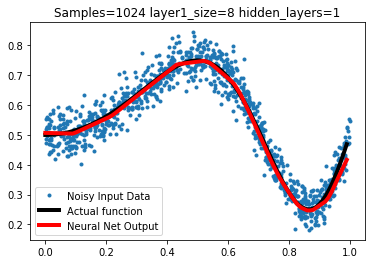

In [67]:
small_layer1 = make_scenario(hidden_layers=1)

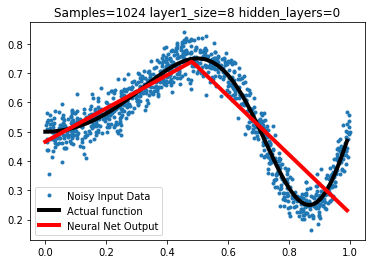

In [68]:
small_layer1 = make_scenario(hidden_layers=0)

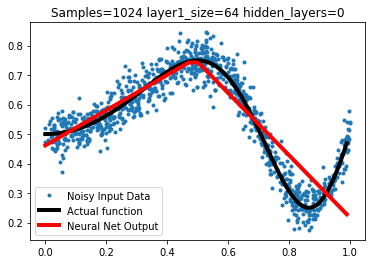

In [69]:
small_layer1 = make_scenario(hidden_layers=0, layer1_size=64)

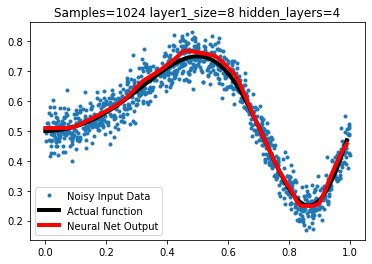

In [70]:
small_layer1 = make_scenario(hidden_layers=4)

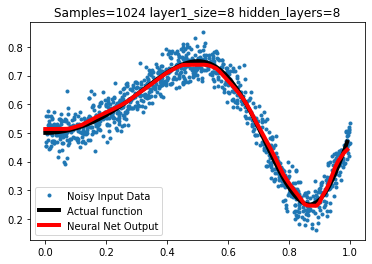

In [71]:
small_layer1 = make_scenario(hidden_layers=8)

Looks like we only need 1 hidden layer, and more than that doesn't make much difference.  Might always want to use some regularization.

### Layer Size

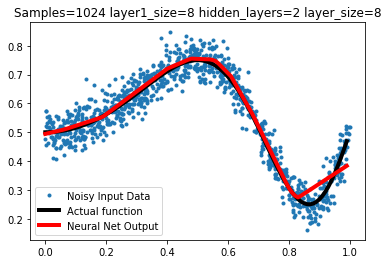

In [75]:
layer_size = make_scenario(layer_size=8)

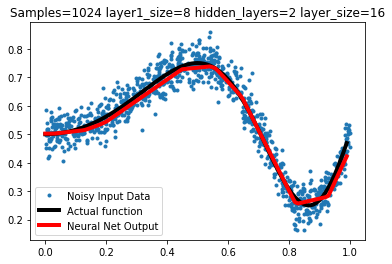

In [76]:
layer_size = make_scenario(layer_size=16)

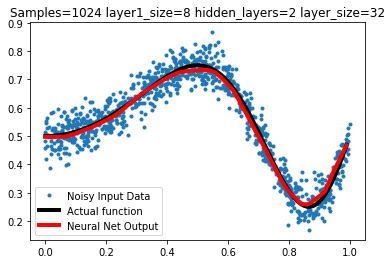

In [77]:
layer_size = make_scenario(layer_size=32)

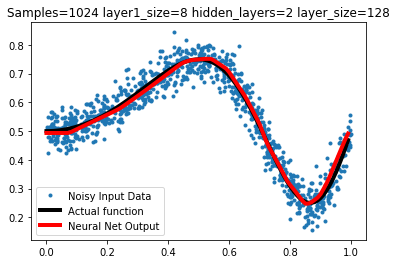

In [78]:
layer_size = make_scenario(layer_size=128)

Looks like for this function we don't need more than 32 nodes in the layers.

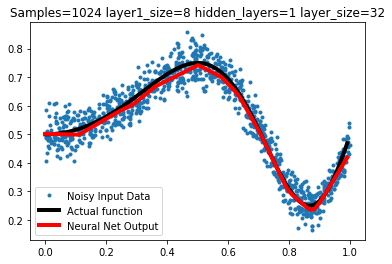

In [82]:
# This looks like the minimal setup for good performance on this function.
_ = make_scenario(layer_size=32, hidden_layers=1)